In [1]:
import pandas as pd
import numpy as np
import re

In [3]:
# Reading in the raw file -combined file from  3 weeks of streaming-
# The input file include the userID, username, the actual text, number of RTs and Likes

#df_0 = pd.read_csv("tweets.GenZ.csv")
df_0 = pd.read_csv("climate.tweets.csv")

df = df_0.dropna()

# To remove the b' from text and decode it from utf-8
#df['Tweet Content'] = df['Tweet Content'].apply(ast.literal_eval).str.decode("utf-8")

df.head(10)

,Tweet Id,Tweet URL,Tweet Posted Time,Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,User Id,Name,Username,User Bio,Verified or Non-Verified,Profile URL,User Followers,User Following,User Account Creation Date
0,"""1707749803692634165""",https://twitter.com/fungihunter2022/status/170...,29 Sep 2023 13:30:56,"""@fmartin1954 Given their world wide distribut...",Reply,"""Not found""",0,0,"""""",en,"""1597246805640626177""","""Zheng Wang""",fungihunter2022,"""A mycologist very bad at remembering names...""",Non-Verified,https://twitter.com/fungihunter2022,28,71,28-Nov-2022 15:12:22
1,"""1707749683219890229""",https://twitter.com/EvlondoCooper/status/17077...,29 Sep 2023 13:30:27,"""Last week, @amywestervelt joined @CoveringCli...",ReTweet,"""Not found""",4,0,"""""",en,"""919923420913074178""","""Evlondo Cooper III""",EvlondoCooper,"""Senior Writer, Climate and Energy Program for...",Non-Verified,https://twitter.com/EvlondoCooper,1535,1835,16-Oct-2017 13:50:09
2,"""1707749570116255992""",https://twitter.com/UnitedGMH/status/170774957...,29 Sep 2023 13:30:00,"""@UnitedGMH is hosting workshop 3 at the Globa...",Tweet,"""Not found""",0,0,"""""",en,"""1011639364881977344""","""United for Global Mental Health""",UnitedGMH,"""United for Global Mental Health is dedicated ...",Non-Verified,https://twitter.com/UnitedGMH,12124,1298,26-Jun-2018 15:56:34
3,"""1707749529687085559""",https://twitter.com/ConStar24/status/170774952...,29 Sep 2023 13:29:50,"""Really great that as the climate literally ch...",Tweet,"""Not found""",0,0,"""""",en,"""109449668""","""Connie keeps losing her spoons""",ConStar24,"""Social @ Scholastic • Writer • 🎙Host: @nerdsa...",Non-Verified,https://twitter.com/ConStar24,6550,1489,29-Jan-2010 02:48:22
4,"""1707749421943779352""",https://twitter.com/Cult_Unstained/status/1707...,29 Sep 2023 13:29:25,"""Last week, @amywestervelt joined @CoveringCli...",ReTweet,"""Not found""",3,0,"""""",en,"""900398191438417921""","""Culture Unstained""",Cult_Unstained,"""Ending oil sponsorship of culture https://t.c...",Non-Verified,https://twitter.com/Cult_Unstained,5193,2306,23-Aug-2017 16:43:52
5,"""1707749064392278072""",https://twitter.com/paulimeth/status/170774906...,29 Sep 2023 13:28:00,"""It shouldn't even have to be said, but journa...",Tweet,"""Not found""",0,0,"""""",en,"""1726422794""","""Hunter Pauli""",paulimeth,"""Freelance Montana reporter. Oil, drugs and fa...",Non-Verified,https://twitter.com/paulimeth,2753,490,03-Sep-2013 19:22:24
6,"""1707749044469014546""",https://twitter.com/ALphaMach1ne/status/170774...,29 Sep 2023 13:27:55,"""Last week, @amywestervelt joined @CoveringCli...",ReTweet,"""Not found""",2,0,"""""",en,"""257219643""","""ALpha Mach1ne""",ALphaMach1ne,"""Pixel Wrangler and Ex Pessimist.\n \n#RebelFo...",Non-Verified,https://twitter.com/ALphaMach1ne,2298,4742,25-Feb-2011 00:04:26
7,"""1707749010713309549""",https://twitter.com/corn_teen/status/170774901...,29 Sep 2023 13:27:47,"""Going from the south of France to the North o...",Tweet,"""Not found""",0,0,"""""",en,"""1215736665626566656""","""Verona Walls""",corn_teen,"""suicidal goldfish""",Non-Verified,https://twitter.com/corn_teen,312,216,10-Jan-2020 20:46:40
8,"""1707748871441703211""",https://twitter.com/JaquesDeMournay/status/170...,29 Sep 2023 13:27:14,"""@GrantMa24544383 @rachelrwithers Basically wh...",Reply,"""Not found""",0,0,"""""",en,"""2433690494""","""God Emperor Lord Leto II""",JaquesDeMournay,"""Beekeeper. Mark Twain — 'Never argue with an ...",Non-Verified,https://twitter.com/JaquesDeMournay,208,90,08-Apr-2014 14:24:07
9,"""1707748685759852826""",https://twitter.com/amywestervelt/status/17077...,29 Sep 2023 13:26:29,"""Last week, @amywestervelt joined @CoveringCli...",ReTweet,"""Not found""",1,0,"""""",en,"""14779408""","""Amy Westervelt""",amywestervelt,"""Investigative journo. Run @WeAreDrilled and @...",Non-Verified,https://twitter.com/amywestervelt,64691,2638,14-May-2008 22:06:04


In [4]:
# Tạo dataFrame cho bộ dữ liệu
data = pd.DataFrame(df, columns =['Tweet Content'])
data

,Tweet Content
0,"""@fmartin1954 Given their world wide distribut..."
1,"""Last week, @amywestervelt joined @CoveringCli..."
2,"""@UnitedGMH is hosting workshop 3 at the Globa..."
3,"""Really great that as the climate literally ch..."
4,"""Last week, @amywestervelt joined @CoveringCli..."
...,...
226,"""After Ethiopia started the #Green_Legacy pro..."
227,"""The EU-funded project @DISTENDER_eu focuses o..."
228,"""After Ethiopia started the #Green_Legacy pr..."
229,"""@StephenWall1985 Top 14 won't last if all oth..."


**Trực quan hóa các từ có trong tập dữ liệu**

In [5]:
def word_count(sentence):
    return len(sentence.split())

data['word count'] = data['Tweet Content'].apply(word_count)
data['word count'].describe()

count    230.000000
mean      33.973913
std       14.383373
min        3.000000
25%       26.000000
50%       36.000000
75%       42.750000
max      100.000000
Name: word count, dtype: float64

In [6]:
import collections
all_words = []
for line in list(data['Tweet Content']): #Chia chuỗi thành các đơn từ
    words = line.split()
    for word in words:
        all_words.append(word.lower())

collections.Counter(all_words).most_common(10)#In ra 10 từ phổ biến nhất

[('the', 332),
 ('to', 171),
 ('climate', 167),
 ('and', 155),
 ('in', 150),
 ('changes', 141),
 ('of', 133),
 ('is', 116),
 ('that', 96),
 ('a', 88)]

In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk

In [10]:
pip install wordcloud

   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ------- ------------------------------- 30.7/151.4 kB 660.6 kB/s eta 0:00:01
   ------------------------------------- -- 143.4/151.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt

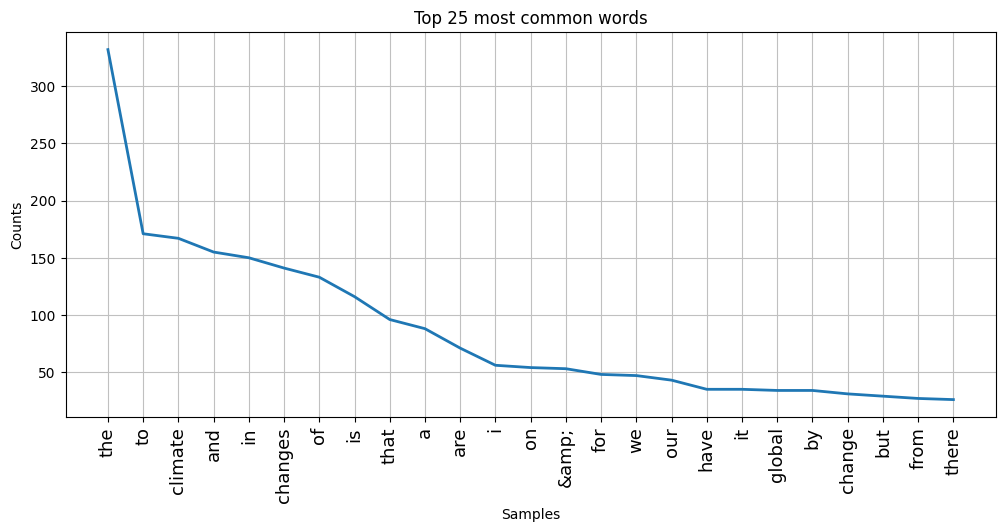

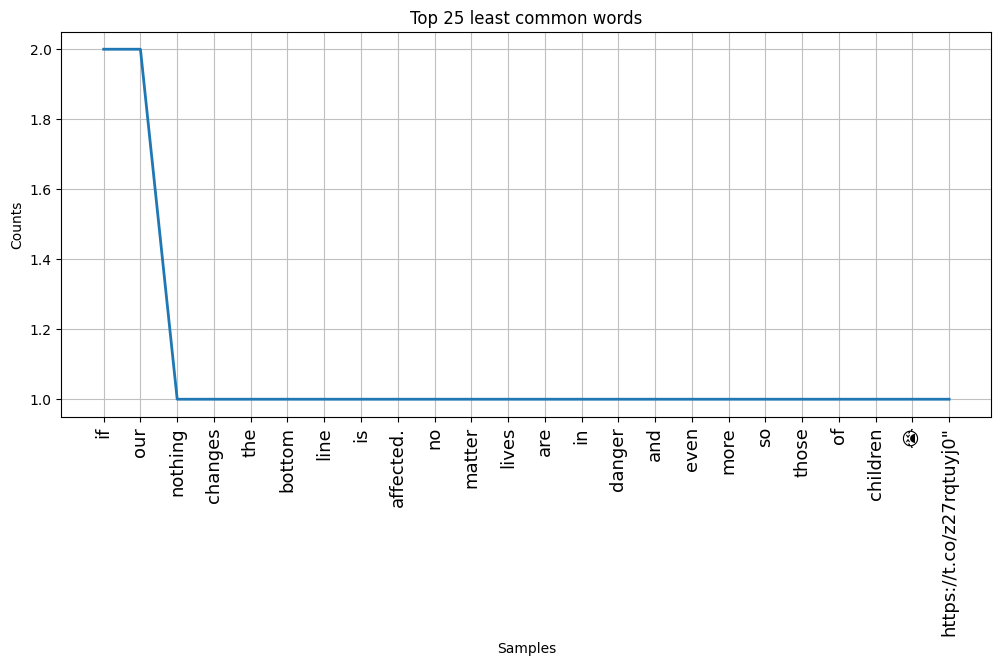

Text(0.5, 0, 'Word Rank')

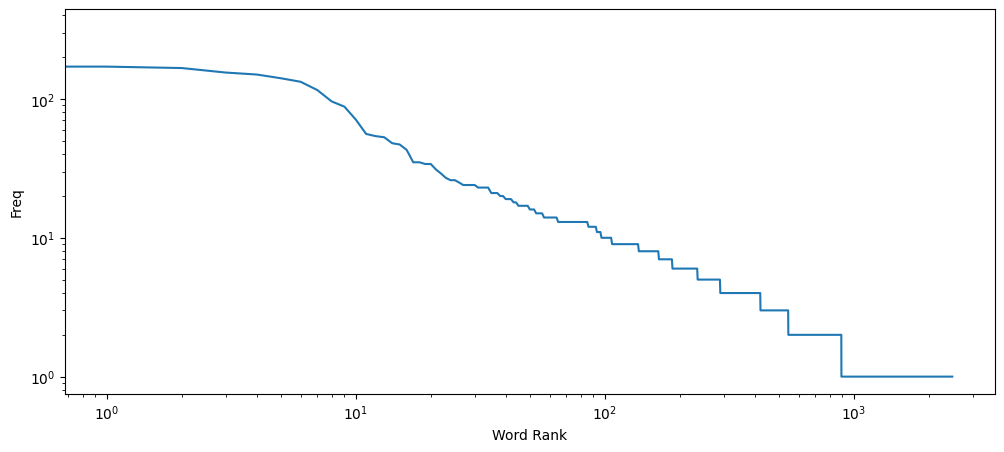

In [12]:
# plot word frequency distribution of most common words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# plot word frequency distribution of least common words
plt.figure(figsize=(12,5))
plt.title('Top 25 least common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words[-26:])
fd.plot(cumulative=False)

# log-log plot
word_counts = sorted(collections.Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

x**Tiền xử lý dữ liệu**

In [13]:
import string
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'['+string.punctuation+']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ')
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')
    return tweet

In [14]:
# clean dataframe's text column
data['text'] = data['Tweet Content'].apply(processTweet)
# preview some cleaned tweets
data['text'].head()

0    given their world wide distribution strains ad...
1    last week joined climate changes everything co...
2    hosting workshop the global mental health summ...
3    really great that the climate literally change...
4    last week joined climate changes everything co...
Name: text, dtype: object

**## Lemmatization**

In [15]:
from nltk.stem import WordNetLemmatizer
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()
lemmatizer=WordNetLemmatizer() # Xóa bỏ các hậu tố
def lemmatize_text(text):
    return[lemmatizer.lemmatize(w)for w in w_tokenizer.tokenize(text)]

In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\becode\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
data['lemm_tweet']=data.text.apply(lemmatize_text)
data['temp_tweet']=[' '.join(map(str, l))for l in data['lemm_tweet']]

data.head()

,Tweet Content,word count,text,lemm_tweet,temp_tweet
0,"""@fmartin1954 Given their world wide distribut...",33,given their world wide distribution strains ad...,"[given, their, world, wide, distribution, stra...",given their world wide distribution strain ada...
1,"""Last week, @amywestervelt joined @CoveringCli...",37,last week joined climate changes everything co...,"[last, week, joined, climate, change, everythi...",last week joined climate change everything con...
2,"""@UnitedGMH is hosting workshop 3 at the Globa...",36,hosting workshop the global mental health summ...,"[hosting, workshop, the, global, mental, healt...",hosting workshop the global mental health summ...
3,"""Really great that as the climate literally ch...",14,really great that the climate literally change...,"[really, great, that, the, climate, literally,...",really great that the climate literally change...
4,"""Last week, @amywestervelt joined @CoveringCli...",37,last week joined climate changes everything co...,"[last, week, joined, climate, change, everythi...",last week joined climate change everything con...


In [18]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_english = stopwords.words('english')
print (stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\becode\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 262.6 kB/s eta 0:00:03
     ----- ------------------------------- 92.2/636.8 kB 655.4 kB/s eta 0:00:01
     --------------------------------- ---- 563.2/636.8 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
from textblob import Word
def text_process(raw_text):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # remove all stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords_english]

def remove_words(word_list):
    remove = ['i','me','my','flight','hour','minute','wa','airline','bag','plane','cancelled','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours','yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that',"that'll",'these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','...','“','”','’','...']
    return [w for w in word_list if w not in remove]

In [23]:
# tokenize message column and create a column for tokens
data['temp']=data['temp_tweet'].apply(text_process)
data['tokens']=data['temp'].apply(remove_words)

data[['text','temp_tweet','temp','tokens']]

,text,temp_tweet,temp,tokens
0,given their world wide distribution strains ad...,given their world wide distribution strain ada...,"[given, world, wide, distribution, strain, ada...","[given, world, wide, distribution, strain, ada..."
1,last week joined climate changes everything co...,last week joined climate change everything con...,"[last, week, joined, climate, change, everythi...","[last, week, joined, climate, change, everythi..."
2,hosting workshop the global mental health summ...,hosting workshop the global mental health summ...,"[hosting, workshop, global, mental, health, su...","[hosting, workshop, global, mental, health, su..."
3,really great that the climate literally change...,really great that the climate literally change...,"[really, great, climate, literally, change, in...","[really, great, climate, literally, change, in..."
4,last week joined climate changes everything co...,last week joined climate change everything con...,"[last, week, joined, climate, change, everythi...","[last, week, joined, climate, change, everythi..."
...,...,...,...,...
226,after ethiopia started the program good climat...,after ethiopia started the program good climat...,"[ethiopia, started, program, good, climate, ch...","[ethiopia, started, program, good, climate, ch..."
227,the funded project focuses another essential c...,the funded project focus another essential con...,"[funded, project, focus, another, essential, c...","[funded, project, focus, another, essential, c..."
228,after ethiopia started the program good climat...,after ethiopia started the program good climat...,"[ethiopia, started, program, good, climate, ch...","[ethiopia, started, program, good, climate, ch..."
229,top won last all other all rugby outside franc...,top won last all other all rugby outside franc...,"[top, last, rugby, outside, france, dy, predic...","[top, last, rugby, outside, france, dy, predic..."


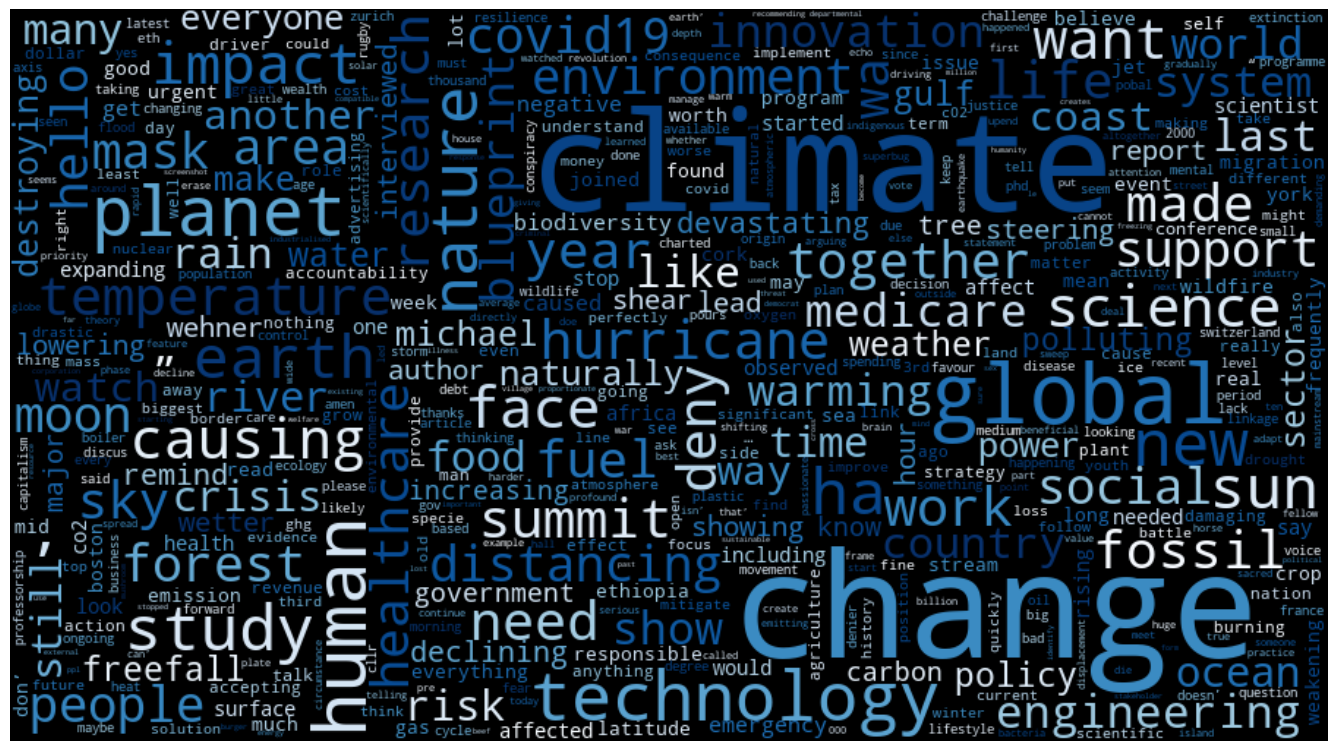

In [24]:
# split sentences to get individual words
all_words = []
for line in data['temp']:
    all_words.extend(line)


# create a word frequency dictionary
wordfreq = collections.Counter(all_words)# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
import collections
all_words = []
for line in list(data['tokens']):
    for word in line:
        all_words.append(word.lower())

collections.Counter(all_words).most_common(10)

[('change', 226),
 ('climate', 204),
 ('global', 39),
 ('human', 29),
 ('planet', 27),
 ('technology', 26),
 ('new', 23),
 ('nature', 23),
 ('ha', 22),
 ('study', 22)]

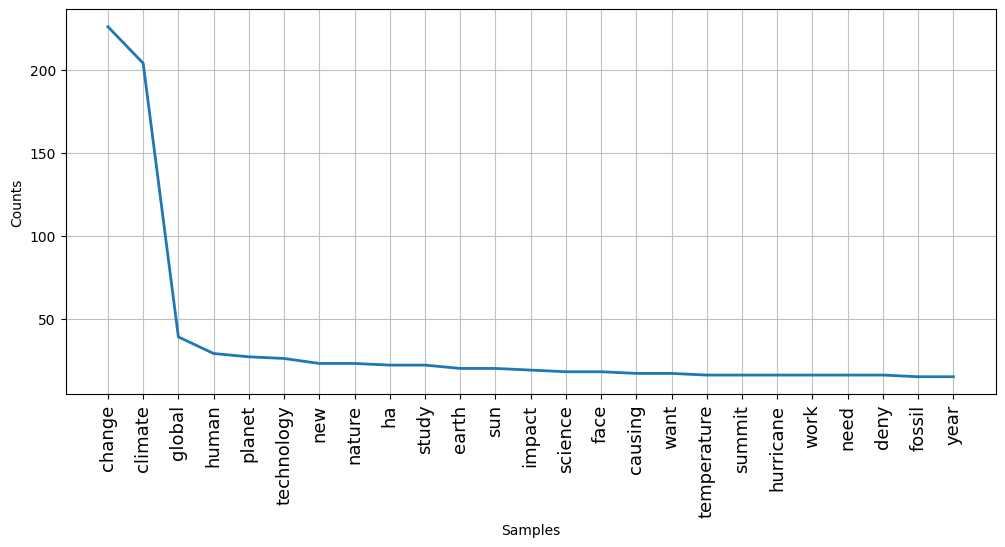

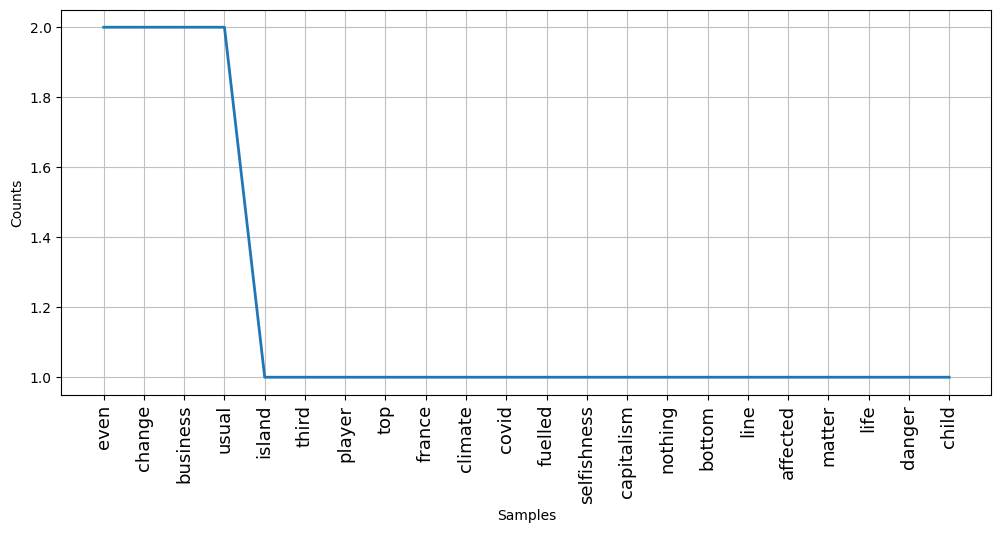

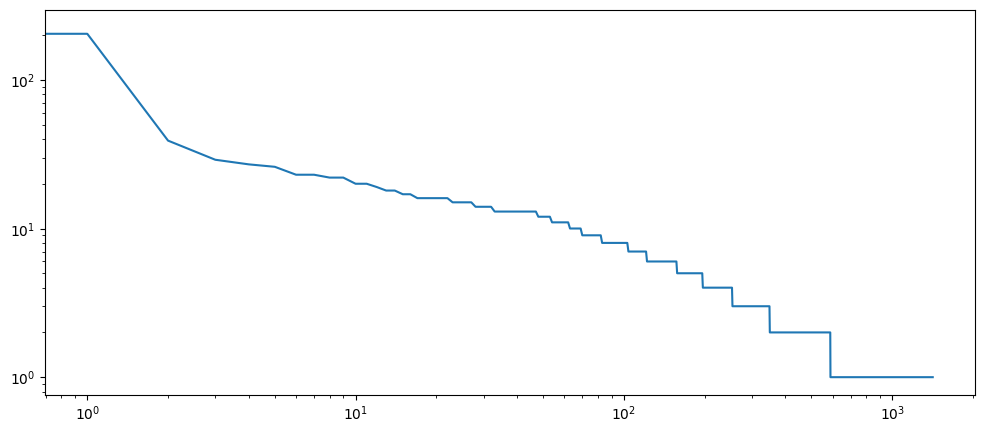

In [26]:
#plot word frequency distribution of most common words
plt.figure(figsize=(12,5))
#plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# plot word frequency distribution of least common words
plt.figure(figsize=(12,5))
#plt.title('Top 25 least common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words[-26:])
fd.plot(cumulative=False)

# log-log plot
word_counts = sorted(collections.Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
#plt.ylabel("Freq")
#plt.xlabel("Word Rank")
#plt.title('log-log plot of words frequency')

In [27]:
data.head()

,Tweet Content,word count,text,lemm_tweet,temp_tweet,temp,tokens
0,"""@fmartin1954 Given their world wide distribut...",33,given their world wide distribution strains ad...,"[given, their, world, wide, distribution, stra...",given their world wide distribution strain ada...,"[given, world, wide, distribution, strain, ada...","[given, world, wide, distribution, strain, ada..."
1,"""Last week, @amywestervelt joined @CoveringCli...",37,last week joined climate changes everything co...,"[last, week, joined, climate, change, everythi...",last week joined climate change everything con...,"[last, week, joined, climate, change, everythi...","[last, week, joined, climate, change, everythi..."
2,"""@UnitedGMH is hosting workshop 3 at the Globa...",36,hosting workshop the global mental health summ...,"[hosting, workshop, the, global, mental, healt...",hosting workshop the global mental health summ...,"[hosting, workshop, global, mental, health, su...","[hosting, workshop, global, mental, health, su..."
3,"""Really great that as the climate literally ch...",14,really great that the climate literally change...,"[really, great, that, the, climate, literally,...",really great that the climate literally change...,"[really, great, climate, literally, change, in...","[really, great, climate, literally, change, in..."
4,"""Last week, @amywestervelt joined @CoveringCli...",37,last week joined climate changes everything co...,"[last, week, joined, climate, change, everythi...",last week joined climate change everything con...,"[last, week, joined, climate, change, everythi...","[last, week, joined, climate, change, everythi..."


In [28]:
data['clean_tweet'] = [' '.join(map(str, l)) for l in data['tokens']]
data=data.drop(columns=['lemm_tweet','text','temp','temp_tweet', 'word count'])
data.head()

,Tweet Content,tokens,clean_tweet
0,"""@fmartin1954 Given their world wide distribut...","[given, world, wide, distribution, strain, ada...",given world wide distribution strain adapted w...
1,"""Last week, @amywestervelt joined @CoveringCli...","[last, week, joined, climate, change, everythi...",last week joined climate change everything con...
2,"""@UnitedGMH is hosting workshop 3 at the Globa...","[hosting, workshop, global, mental, health, su...",hosting workshop global mental health summit c...
3,"""Really great that as the climate literally ch...","[really, great, climate, literally, change, in...",really great climate literally change infrastr...
4,"""Last week, @amywestervelt joined @CoveringCli...","[last, week, joined, climate, change, everythi...",last week joined climate change everything con...


In [29]:
from nltk import bigrams
terms_bigram = [list(bigrams(tweet)) for tweet in data.tokens]
terms_bigram[0]

[('given', 'world'),
 ('world', 'wide'),
 ('wide', 'distribution'),
 ('distribution', 'strain'),
 ('strain', 'adapted'),
 ('adapted', 'warm'),
 ('warm', 'temperature'),
 ('temperature', 'probably'),
 ('probably', 'long'),
 ('long', 'time'),
 ('time', 'migrate'),
 ('migrate', 'new'),
 ('new', 'location'),
 ('location', 'human'),
 ('human', 'population'),
 ('population', 'recently'),
 ('recently', 'due'),
 ('due', 'climate'),
 ('climate', 'change')]

In [30]:
import itertools
# Flatten list of bigrams in clean tweets
# In tất cả các giá trị có trong terms_bigram có thể lặp lại lần lượt
bigrams = list(itertools.chain(*terms_bigram))
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)
bigram_counts.most_common(25)

[(('climate', 'change'), 106),
 (('change', 'climate'), 21),
 (('fossil', 'fuel'), 14),
 (('hello', 'support'), 13),
 (('support', 'covid19'), 13),
 (('covid19', 'social'), 13),
 (('social', 'distancing'), 13),
 (('distancing', 'face'), 13),
 (('face', 'mask'), 13),
 (('mask', 'planet'), 13),
 (('planet', 'global'), 13),
 (('global', 'earth'), 13),
 (('earth', 'sun'), 13),
 (('sun', 'moon'), 13),
 (('moon', 'sky'), 13),
 (('sky', 'want'), 13),
 (('want', 'work'), 13),
 (('work', 'together'), 13),
 (('together', 'engineering'), 13),
 (('engineering', 'technology'), 13),
 (('technology', 'medicare'), 13),
 (('medicare', 'healthcare'), 13),
 (('healthcare', 'innovation'), 13),
 (('innovation', 'science'), 13),
 (('science', 'technology'), 13)]

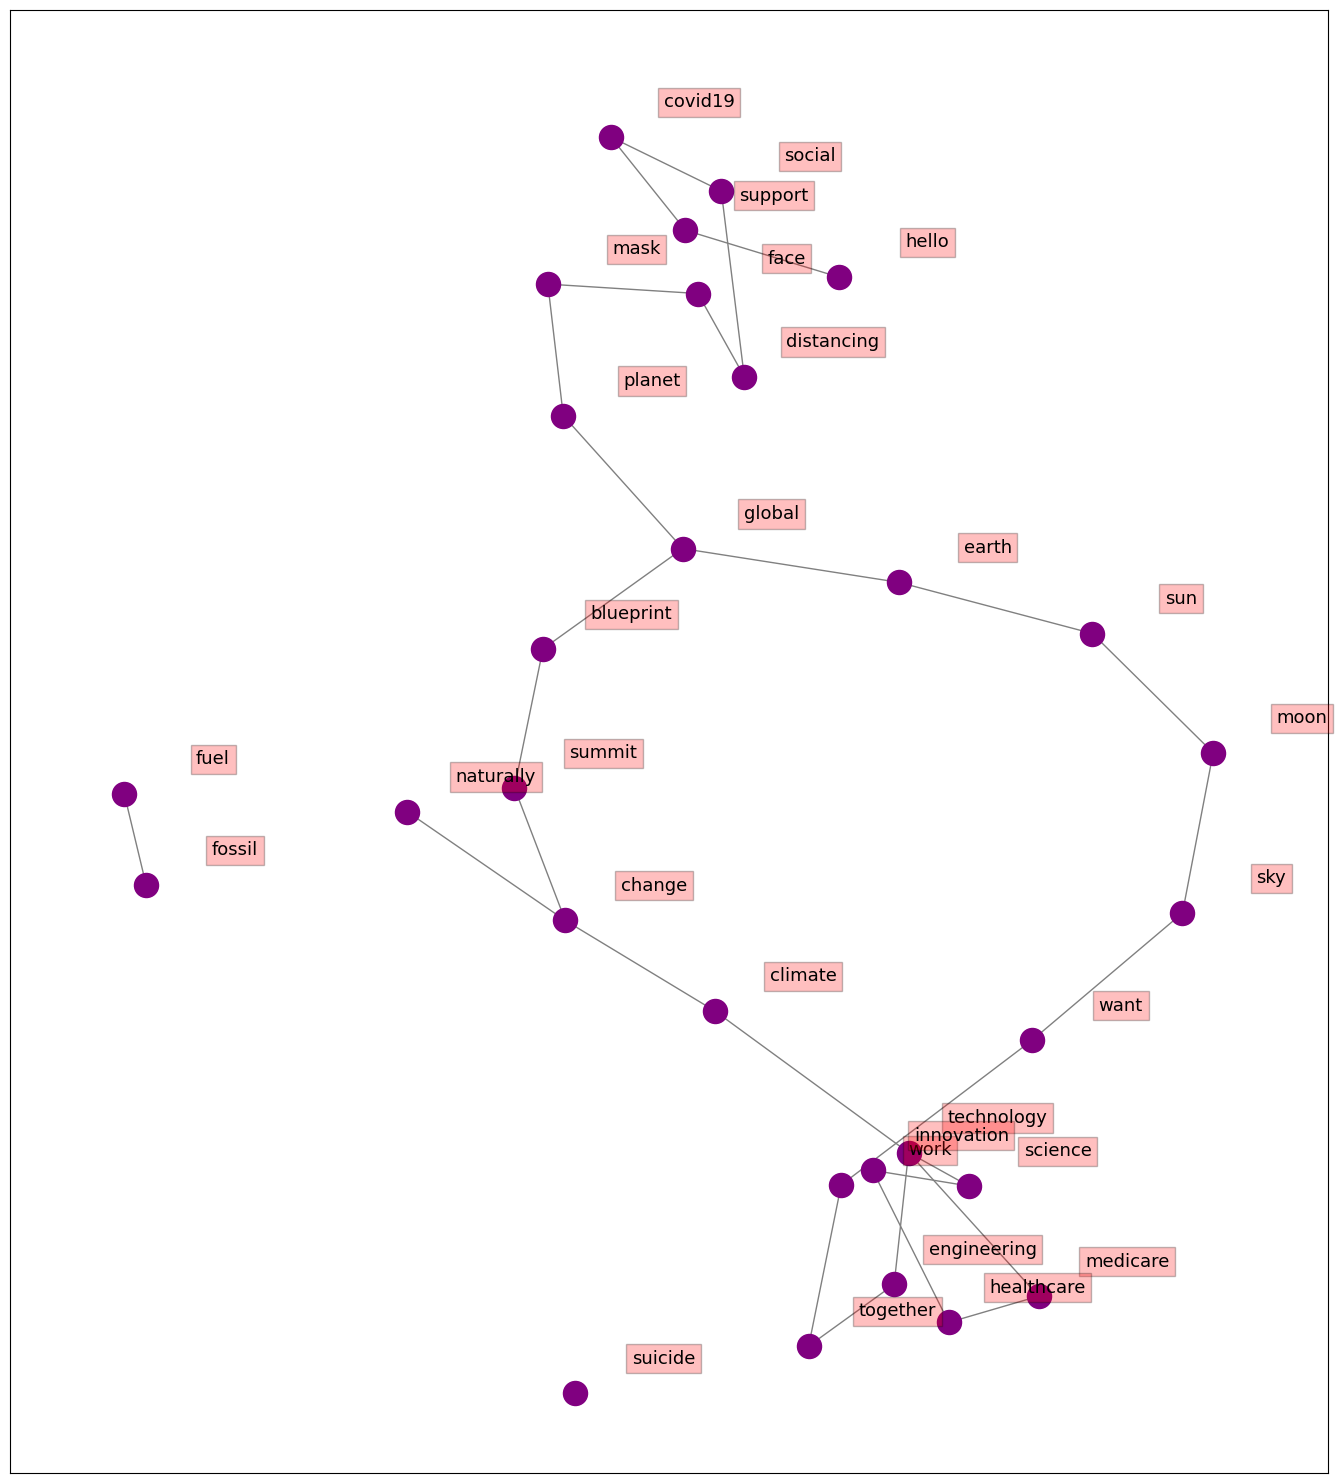

In [31]:
import networkx as nx
bigram_df = pd.DataFrame(bigram_counts.most_common(30),columns=['bigram', 'count'])

# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot # Tạo một biểu đồ trống
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("suicide", weight=100) # Thêm node sad tỏng G

fig, ax = plt.subplots(figsize=(17, 19))

pos = nx.spring_layout(G, k=2) # tanawmg khoảng cách giữa các node là 2

# Plot networks
nx.draw_networkx(G, pos,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)

plt.show()

**Sentiment Analysis**

In [32]:
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\becode\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# assuming your cleaned data is in a DataFrame called 'df' and the text is in a column called 'text'
# initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# apply the VADER sentiment analyzer to each sentence in the 'text' column and create a new column called 'sentiment'
data['sentiment'] = data['clean_tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

# classify each sentence as positive, negative or neutral based on the 'sentiment' score
data['sentiment_class'] = pd.cut(data['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])

# print the first 10 rows of the DataFrame
print(data.head(10))


                                       Tweet Content  \
0  "@fmartin1954 Given their world wide distribut...   
1  "Last week, @amywestervelt joined @CoveringCli...   
2  "@UnitedGMH is hosting workshop 3 at the Globa...   
3  "Really great that as the climate literally ch...   
4  "Last week, @amywestervelt joined @CoveringCli...   
5  "It shouldn't even have to be said, but journa...   
6  "Last week, @amywestervelt joined @CoveringCli...   
7  "Going from the south of France to the North o...   
8  "@GrantMa24544383 @rachelrwithers Basically wh...   
9  "Last week, @amywestervelt joined @CoveringCli...   

                                              tokens  \
0  [given, world, wide, distribution, strain, ada...   
1  [last, week, joined, climate, change, everythi...   
2  [hosting, workshop, global, mental, health, su...   
3  [really, great, climate, literally, change, in...   
4  [last, week, joined, climate, change, everythi...   
5      [even, said, journalism, ha, gotten, cor

In [34]:
import numpy as np

# Define neutral range
neutral_min = -0.2
neutral_max = 0.2

# Create empty list for sentiment labels
sentiment_labels = []

# Loop through sentiment scores
for score in data.sentiment:
    if score < neutral_min:
        # Sentiment is negative
        sentiment_labels.append(0)
    elif score > neutral_max:
        # Sentiment is positive
        sentiment_labels.append(1)
    else:
        # Sentiment is neutral
        sentiment_labels.append(2)

In [35]:
data['label'] = sentiment_labels
data

,Tweet Content,tokens,clean_tweet,sentiment,sentiment_class,label
0,"""@fmartin1954 Given their world wide distribut...","[given, world, wide, distribution, strain, ada...",given world wide distribution strain adapted w...,0.1779,positive,2
1,"""Last week, @amywestervelt joined @CoveringCli...","[last, week, joined, climate, change, everythi...",last week joined climate change everything con...,0.0516,neutral,2
2,"""@UnitedGMH is hosting workshop 3 at the Globa...","[hosting, workshop, global, mental, health, su...",hosting workshop global mental health summit c...,0.2732,positive,1
3,"""Really great that as the climate literally ch...","[really, great, climate, literally, change, in...",really great climate literally change infrastr...,0.6590,positive,1
4,"""Last week, @amywestervelt joined @CoveringCli...","[last, week, joined, climate, change, everythi...",last week joined climate change everything con...,0.0516,neutral,2
...,...,...,...,...,...,...
226,"""After Ethiopia started the #Green_Legacy pro...","[ethiopia, started, program, good, climate, ch...",ethiopia started program good climate change o...,0.4404,positive,1
227,"""The EU-funded project @DISTENDER_eu focuses o...","[funded, project, focus, another, essential, c...",funded project focus another essential concept...,-0.7351,negative,0
228,"""After Ethiopia started the #Green_Legacy pr...","[ethiopia, started, program, good, climate, ch...",ethiopia started program good climate change o...,0.4404,positive,1
229,"""@StephenWall1985 Top 14 won't last if all oth...","[top, last, rugby, outside, france, dy, predic...",top last rugby outside france dy prediction st...,0.7003,positive,1


In [43]:
# Calculating Negative, Positive, Neutral and Compound values
data[['polarity', 'subjectivity']] = data['clean_tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in data.iterrows():
    score = SentimentIntensityAnalyzer().polarity_scores(row['clean_tweet'])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    
    data.loc[index, 'neg'] = neg
    data.loc[index, 'neu'] = neu
    data.loc[index, 'pos'] = pos
    data.loc[index, 'compound'] = comp

data.head(5)


,Tweet Content,tokens,clean_tweet,sentiment,sentiment_class,label,polarity,subjectivity,neg,neu,pos,compound
0,"""@fmartin1954 Given their world wide distribut...","[given, world, wide, distribution, strain, ada...",given world wide distribution strain adapted w...,0.1779,positive,2,0.076894,0.388258,0.057,0.853,0.090,0.1779
1,"""Last week, @amywestervelt joined @CoveringCli...","[last, week, joined, climate, change, everythi...",last week joined climate change everything con...,0.0516,neutral,2,0.150000,0.083333,0.128,0.698,0.174,0.0516
2,"""@UnitedGMH is hosting workshop 3 at the Globa...","[hosting, workshop, global, mental, health, su...",hosting workshop global mental health summit c...,0.2732,positive,1,-0.075000,0.150000,0.000,0.890,0.110,0.2732
3,"""Really great that as the climate literally ch...","[really, great, climate, literally, change, in...",really great climate literally change infrastr...,0.6590,positive,1,0.800000,0.750000,0.000,0.614,0.386,0.6590
4,"""Last week, @amywestervelt joined @CoveringCli...","[last, week, joined, climate, change, everythi...",last week joined climate change everything con...,0.0516,neutral,2,0.150000,0.083333,0.128,0.698,0.174,0.0516


In [38]:
data.to_csv("./sentimentanalysis_output.csv", sep=',', encoding='UTF-8')
data.head(5)

,Tweet Content,tokens,clean_tweet,sentiment,sentiment_class,label,polarity,subjectivity
0,"""@fmartin1954 Given their world wide distribut...","[given, world, wide, distribution, strain, ada...",given world wide distribution strain adapted w...,0.1779,positive,2,0.076894,0.388258
1,"""Last week, @amywestervelt joined @CoveringCli...","[last, week, joined, climate, change, everythi...",last week joined climate change everything con...,0.0516,neutral,2,0.150000,0.083333
2,"""@UnitedGMH is hosting workshop 3 at the Globa...","[hosting, workshop, global, mental, health, su...",hosting workshop global mental health summit c...,0.2732,positive,1,-0.075000,0.150000
3,"""Really great that as the climate literally ch...","[really, great, climate, literally, change, in...",really great climate literally change infrastr...,0.6590,positive,1,0.800000,0.750000
4,"""Last week, @amywestervelt joined @CoveringCli...","[last, week, joined, climate, change, everythi...",last week joined climate change everything con...,0.0516,neutral,2,0.150000,0.083333


In [39]:
#Creating new data frames for all sentiments (positive, negative and neutral)

df_negative = data[data["sentiment"]=="negative"]
df_positive = data[data["sentiment"]=="positive"]
df_neutral = data[data["sentiment"]=="neutral"]

In [40]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [41]:
#Count_values for sentiment
count_values_in_column(data,"label")

,Total,Percentage
label,,
1,82,35.65
0,79,34.35
2,69,30.00


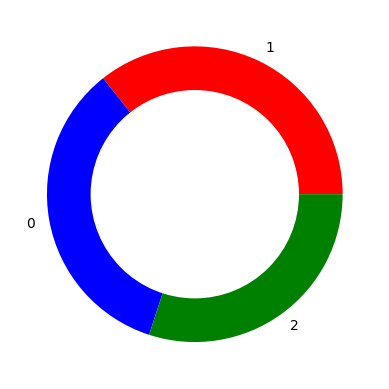

In [42]:
# create data for Pie Chart
pichart = count_values_in_column(data,"label")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['red','blue','green'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()